In [323]:
import os
import pandas as pd


#read the data from your newly created CSV file into a Pandas Dataframe
data_dir = os.path.join(os.getcwd(), 'data')
df_faf1_early= pd.read_csv(os.path.join(data_dir, 'FAF1_2001_reviews_first_weeks.csv'))
df_faf1_early.head()

,Rating,Title,Content,Author Name,Date,Year
0,7,Great action and illogic make this a good B movie,The Fast and the Furious star the always good ...,Quinoa1984,2001-06-22,2001
1,6,Good fun action movie,"I particularly like sport imports, so I had to...",kraziken,2001-06-22,2001
2,7,"It's Fast, It's Furious, and It's Freakin' Awe...",The Fast and the Furious is one hell of a ride...,Justin Harris,2001-06-22,2001
3,9,An adrenaline rush,"The Fast and the Furious is fast, furious, and...",sstaten,2001-06-22,2001
4,9,TRU,I saw this movie on the opening night which wa...,dfashe,2001-06-22,2001


In [324]:
# Check for missing values
df_faf1_early.isnull().sum()

Rating         0
Title          0
Content        0
Author Name    0
Date           0
Year           0
dtype: int64

In [325]:
# 1. Count how often "No rating" occurs in the 'reviewer_rating' column
no_rating_count = df_faf1_early['Rating'].str.contains('No rating', case=False, na=False).sum()
print(f"'No rating' occurs {no_rating_count} times.")


'No rating' occurs 44 times.


In [326]:
import numpy as np
# 2. Replace "No rating" with the mean of all numeric ratings
# First, replace "No rating" with NaN
df_cleaned = df_faf1_early.copy()
df_cleaned['Rating'] = df_faf1_early['Rating'].replace('No rating', np.nan)

# Convert 'reviewer_rating' to numeric (it may have been treated as text previously)
df_cleaned['Rating'] = pd.to_numeric(df_cleaned['Rating'], errors='coerce')


In [327]:

# Calculate the mean of the numeric ratings, ignoring NaN values
mean_rating = df_cleaned['Rating'].mean()

# Replace NaN values (which were previously "No rating") with the mean rating
df_cleaned['Rating'] = df_cleaned['Rating'].fillna(mean_rating)

# 3. Check the data types of all columns
print(df_cleaned.dtypes)


Rating         float64
Title           object
Content         object
Author Name     object
Date            object
Year             int64
dtype: object


In [328]:
# Get the unique values in the 'Rating' column to check if No ratings was properly handled
unique_ratings = df_cleaned['Rating'].unique()
print(unique_ratings)


[ 7.          6.          9.          8.         10.          7.93220339
  2.          1.          3.          5.        ]


In [329]:
#read the data from your newly created CSV file into a Pandas Dataframe
df_faf1_later= pd.read_csv(os.path.join(data_dir, 'FAF1_reviews_2011andlater.csv'))
df_faf1_later.head()

,Rating,Title,Content,Author Name,Date,Year
0,7,The start of a franchise that revolve around c...,This movie was a big hit when it first came ou...,KineticSeoul,2011-04-28,2011
1,7,"It coming at you, FAST AND FURIOUS.","Action movies consists on three things, fast c...",blazesnakes9,2011-05-07,2011
2,3,Shallow movie about hot cars and girls - big p...,"OK, I get it, the movie is only to show hot ca...",nichtssagend,2011-05-29,2011
3,10,Well Worth Your Time,Truck loads are being hi jacked and the LAPD h...,ehrldawg,2011-05-30,2011
4,10,one of the best movies ever made,I can not believe that this movie has only a 6...,kylehaines96,2011-06-22,2011


In [330]:
df_faf1_later.isnull().sum()

Rating         0
Title          0
Content        0
Author Name    0
Date           0
Year           0
dtype: int64

In [331]:
no_rating_count = df_faf1_later['Rating'].str.contains('No rating', case=False, na=False).sum()
print(f"'No rating' occurs {no_rating_count} times.")

'No rating' occurs 10 times.


In [332]:
# Replace "No rating" with the mean of all numeric ratings
# First, replace "No rating" with NaN
df_cleaned_l = df_faf1_later.copy()
df_cleaned_l['Rating'] = df_faf1_later['Rating'].replace('No rating', np.nan)

# Convert 'reviewer_rating' to numeric (it may have been treated as text previously)
df_cleaned_l['Rating'] = pd.to_numeric(df_cleaned_l['Rating'], errors='coerce')


In [333]:

# Calculate the mean of the numeric ratings, ignoring NaN values
mean_rating = df_cleaned_l['Rating'].mean()

# Replace NaN values (which were previously "No rating") with the mean rating
df_cleaned_l['Rating'] = df_cleaned_l['Rating'].fillna(mean_rating)

# 3. Check the data types of all columns
print(df_cleaned_l.dtypes)


Rating         float64
Title           object
Content         object
Author Name     object
Date            object
Year             int64
dtype: object


In [334]:
# Get the unique values in the 'Rating' column to check if No ratings was properly handled
unique_ratings = df_cleaned_l['Rating'].unique()
print(unique_ratings)


[ 7.          3.         10.          9.          7.44230769  5.
  8.          6.          2.          1.          4.        ]


In [335]:
# Check the column names in both dataframes
print(df_cleaned.columns)
print(df_cleaned_l.columns)


Index(['Rating', 'Title', 'Content', 'Author Name', 'Date', 'Year'], dtype='object')
Index(['Rating', 'Title', 'Content', 'Author Name', 'Date', 'Year'], dtype='object')


In [336]:
# Convert 'Date' column to datetime if not already
df_cleaned['Date'] = pd.to_datetime(df_cleaned['Date'])
df_cleaned_l['Date'] = pd.to_datetime(df_cleaned_l['Date'])

     

In [337]:

# Verify data types
print(df_cleaned.dtypes)
print(df_cleaned_l.dtypes)

Rating                float64
Title                  object
Content                object
Author Name            object
Date           datetime64[ns]
Year                    int64
dtype: object
Rating                float64
Title                  object
Content                object
Author Name            object
Date           datetime64[ns]
Year                    int64
dtype: object


In [338]:
# Append the two dataframes (df_data_cleaned and df_data_cleaned_l)
df_combined = pd.concat([df_cleaned, df_cleaned_l], ignore_index=True)

df_combined.head()


,Rating,Title,Content,Author Name,Date,Year
0,7.0,Great action and illogic make this a good B movie,The Fast and the Furious star the always good ...,Quinoa1984,2001-06-22,2001
1,6.0,Good fun action movie,"I particularly like sport imports, so I had to...",kraziken,2001-06-22,2001
2,7.0,"It's Fast, It's Furious, and It's Freakin' Awe...",The Fast and the Furious is one hell of a ride...,Justin Harris,2001-06-22,2001
3,9.0,An adrenaline rush,"The Fast and the Furious is fast, furious, and...",sstaten,2001-06-22,2001
4,9.0,TRU,I saw this movie on the opening night which wa...,dfashe,2001-06-22,2001


In [339]:


# Summary statistics for June-July 2001
summary_2001 = df_cleaned.describe()

# Summary statistics for post-2011
summary_post_2011 = df_cleaned_l.describe()

# Display the summaries
print("Summary for June-July 2001 Dataset:\n", summary_2001)
print("\nSummary for Post-2011 Dataset:\n", summary_post_2011)


Summary for June-July 2001 Dataset:
            Rating                           Date    Year
count  162.000000                            162   162.0
mean     7.932203  2001-06-28 20:17:46.666666624  2001.0
min      1.000000            2001-06-22 00:00:00  2001.0
25%      7.932203            2001-06-24 00:00:00  2001.0
50%      8.000000            2001-06-26 00:00:00  2001.0
75%     10.000000            2001-07-03 00:00:00  2001.0
max     10.000000            2001-07-13 00:00:00  2001.0
std      2.286142                            NaN     0.0

Summary for Post-2011 Dataset:
            Rating                           Date         Year
count  374.000000                            374   374.000000
mean     7.442308  2020-05-25 00:34:39.144384768  2019.989305
min      1.000000            2011-04-28 00:00:00  2011.000000
25%      6.000000            2018-07-08 00:00:00  2018.000000
50%      8.000000            2021-03-07 12:00:00  2021.000000
75%     10.000000            2023-05-28 06:00

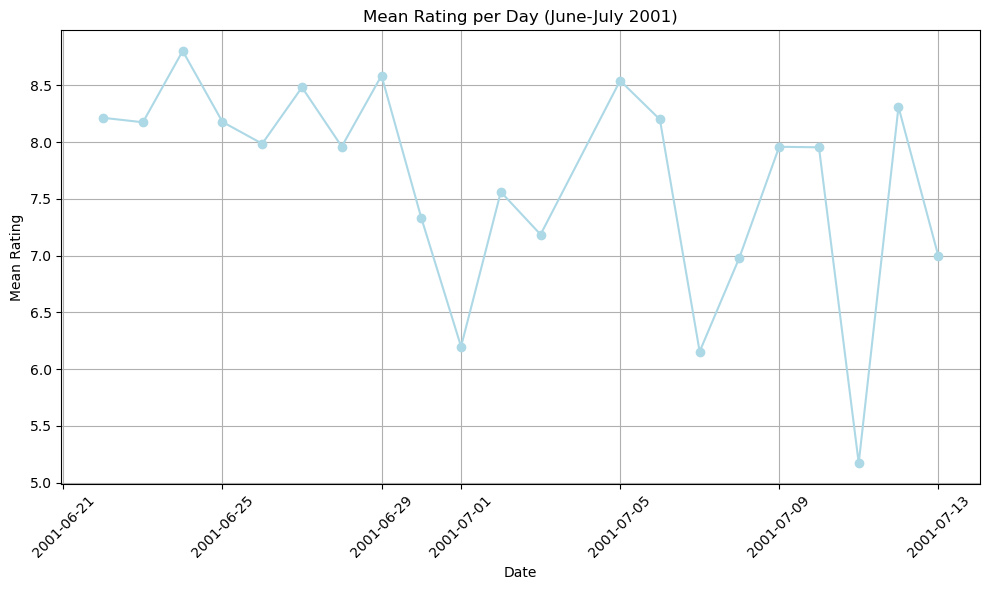

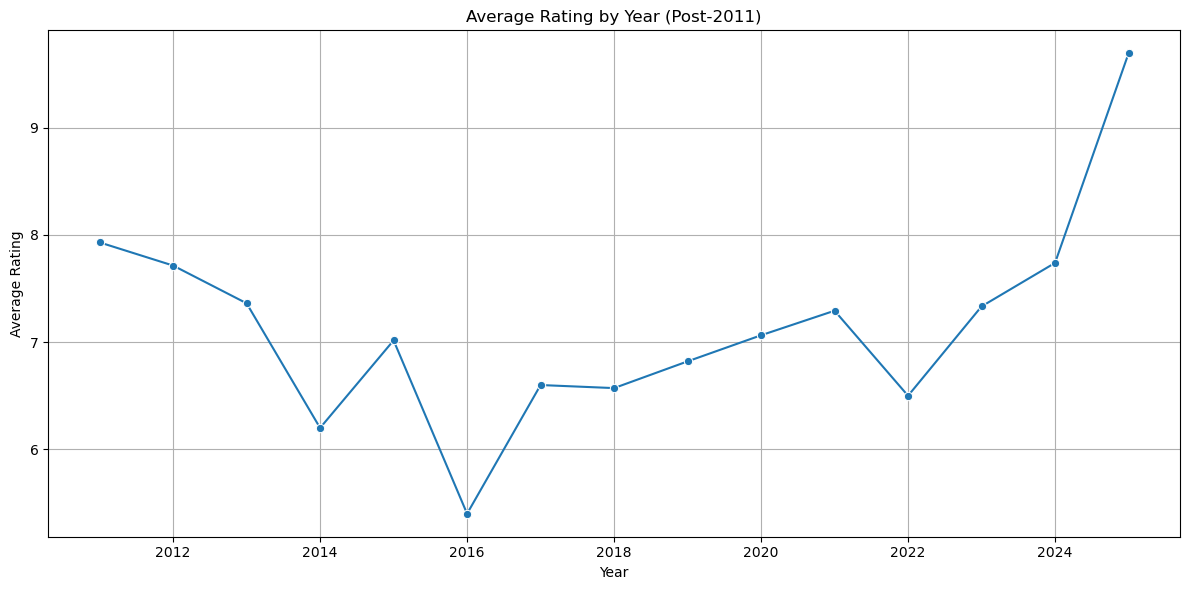

In [340]:
# Plotting histograms for Rating distribution
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

mean_rating_per_day_2001 = df_cleaned.groupby(df_cleaned['Date'].dt.date)['Rating'].mean()

# Plot the mean rating per day for June-July 2001 as a line graph
plt.figure(figsize=(10, 6))
plt.plot(mean_rating_per_day_2001.index, mean_rating_per_day_2001.values, marker='o', linestyle='-', color='lightblue')
plt.title('Mean Rating per Day (June-July 2001)')
plt.xlabel('Date')
plt.ylabel('Mean Rating')
plt.xticks(rotation=45)
plt.tight_layout()
plt.grid(True)
plt.show()

# # June-July 2001
# plt.figure(figsize=(10, 6))
# sns.histplot(df_cleaned['Rating'], kde=True, bins=10)
# plt.title('Distribution of Ratings for June-July 2001')
# plt.xlabel('Rating')
# plt.ylabel('Frequency')
# plt.show()

# Calculate the mean rating for each year
mean_ratings_per_year = df_cleaned_l.groupby('Year')['Rating'].mean()

# Plotting the mean rating across years
plt.figure(figsize=(12, 6))
sns.lineplot(data=mean_ratings_per_year, marker='o')
plt.title('Average Rating by Year (Post-2011)')
plt.xlabel('Year')
plt.ylabel('Average Rating')
plt.grid(True)
plt.tight_layout()
plt.show()




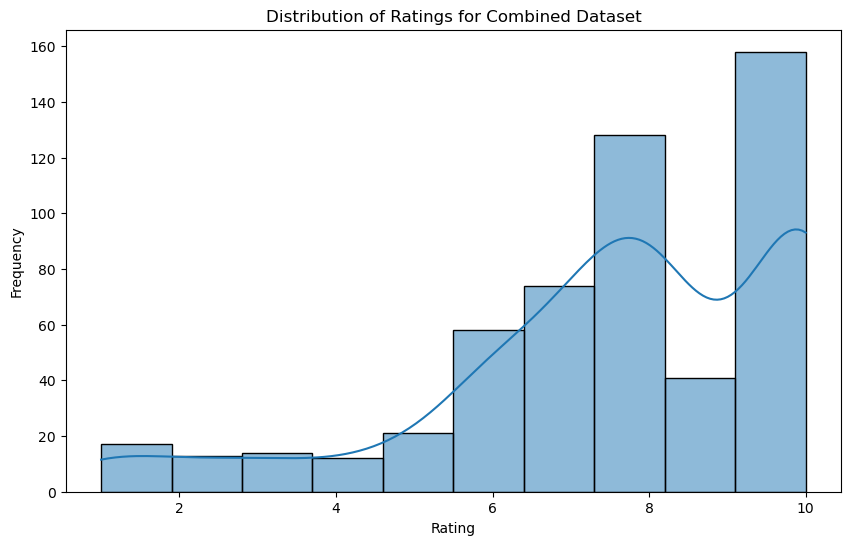

In [341]:


# Plotting histogram for Rating distribution in the combined dataset
plt.figure(figsize=(10, 6))
sns.histplot(df_combined['Rating'], kde=True, bins=10)
plt.title('Distribution of Ratings for Combined Dataset')
plt.xlabel('Rating')
plt.ylabel('Frequency')
plt.show()


In [342]:
# Group reviews by day and count the number of reviews
reviews_by_day_2001 = df_cleaned.groupby(df_cleaned['Date'].dt.date).size()

# Group reviews by day for post-2011
# reviews_by_day_post_2011 = df_cleaned_l.groupby(df_cleaned_l['Date'].dt.date).size()


In [343]:
# Ensure 'Date' column is in datetime format
df_cleaned_l['Date'] = pd.to_datetime(df_cleaned_l['Date'], errors='coerce')

# Check the data types to confirm the conversion
print(df_cleaned_l.dtypes)


Rating                float64
Title                  object
Content                object
Author Name            object
Date           datetime64[ns]
Year                    int64
dtype: object


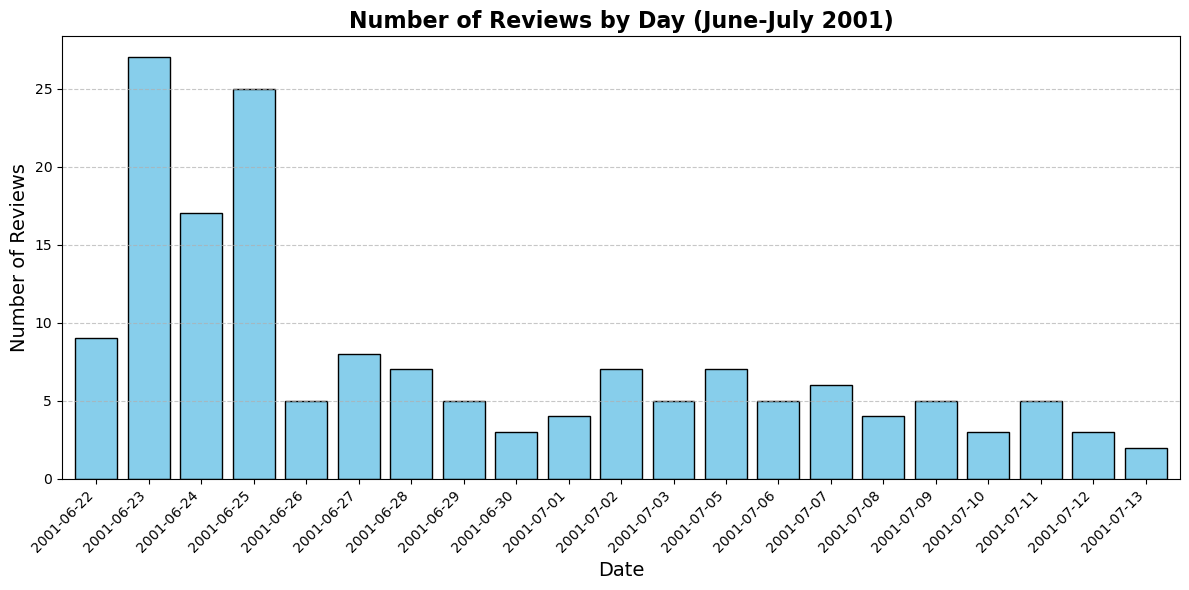

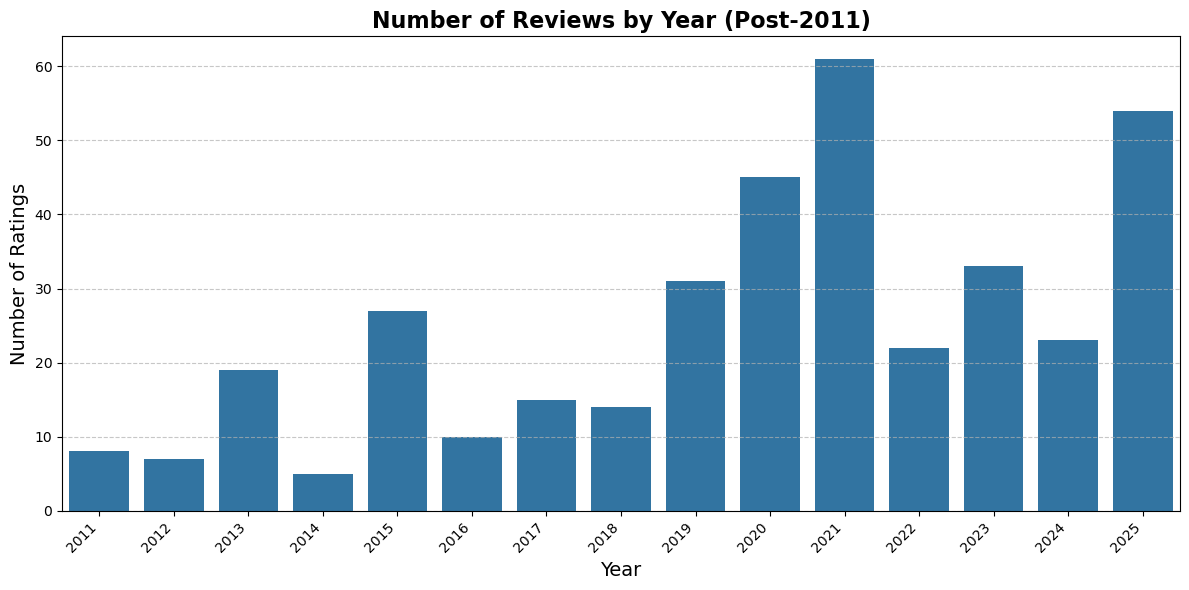

In [344]:

plt.figure(figsize=(12, 6))
reviews_by_day_2001.plot(kind='bar', color='skyblue', edgecolor='black', width=0.8)
plt.title('Number of Reviews by Day (June-July 2001)', fontsize=16, fontweight='bold')
plt.xlabel('Date', fontsize=14)
plt.ylabel('Number of Reviews', fontsize=14)
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()



plt.figure(figsize=(12, 6))
sns.barplot(x=ratings_per_year.index, y=ratings_per_year.values)
plt.title('Number of Reviews by Year (Post-2011)', fontsize=16, fontweight='bold')
plt.xlabel('Year', fontsize=14)
plt.ylabel('Number of Ratings', fontsize=14)
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

In [345]:
import pandas as pd

# Set pandas display option to show all rows
pd.set_option('display.max_rows', None)

# Now print the entire DataFrame
print(df_cleaned_l)

# Optionally, reset the display option back to default after you're done
# pd.reset_option('display.max_rows')


        Rating                                              Title  \
0     7.000000  The start of a franchise that revolve around c...   
1     7.000000                It coming at you, FAST AND FURIOUS.   
2     3.000000  Shallow movie about hot cars and girls - big p...   
3    10.000000                               Well Worth Your Time   
4    10.000000                   one of the best movies ever made   
5    10.000000                                  True blockbuster.   
6     9.000000               It's more than just an action movie.   
7     7.442308  An action packed ride that will please gear-he...   
8     7.000000  The Fast and the Furious (2001) - Vin Diesel a...   
9     5.000000  OK film - did it encourage the 3 guys who died...   
10    8.000000                                  Great great film!   
11   10.000000                    The legend that started it all!   
12    8.000000                       The one that started it all!   
13   10.000000      If you haven't

In [346]:
df_faf2_early= pd.read_csv(os.path.join(data_dir, 'FAF2_2003_reviews_first weeks.csv'))
df_faf2_early.head()

,Rating,Title,Content,Author Name,Date,Year
0,1,How many times can Paul Walker say 'Bro'?,I liked Fast and the Furious... it had Diesel ...,Steal-No-Evol,2003-06-06,2003
1,1,ABSOLUTELY AWFUL,"Don't waste your time, energy, & money on seei...",marchinglion2003,2003-06-06,2003
2,1,Promoting false Macho Images Through Models dr...,Fast Cars equals Strength and Popularity?Is Am...,daltonmania,2003-06-06,2003
3,2,Almost as bad as Driven. And that's REALLY bad.,Firstly let me say that I'm a huge fan of moto...,hillsracing30,2003-06-06,2003
4,7,Fun Movie,We went opening night - my husband (architect)...,JBFLeBlanc,2003-06-06,2003


In [347]:
df_faf2_early.isnull().sum()
no_rating_count = df_faf2_early['Rating'].str.contains('No rating', case=False, na=False).sum()
print(f"'No rating' occurs {no_rating_count} times.")


'No rating' occurs 33 times.


In [348]:
# 2. Replace "No rating" with the mean of all numeric ratings
# First, replace "No rating" with NaN
df_cleaned_2003 = df_faf2_early.copy()
df_cleaned_2003['Rating'] = df_faf2_early['Rating'].replace('No rating', np.nan)

# Convert 'reviewer_rating' to numeric (it may have been treated as text previously)
df_cleaned_2003['Rating'] = pd.to_numeric(df_cleaned_2003['Rating'], errors='coerce')

# Calculate the mean of the numeric ratings, ignoring NaN values
mean_rating = df_cleaned_2003['Rating'].mean()

# Replace NaN values (which were previously "No rating") with the mean rating
df_cleaned_2003['Rating'] = df_cleaned_2003['Rating'].fillna(mean_rating)

# 3. Check the data types of all columns
print(df_cleaned_2003.dtypes)


Rating         float64
Title           object
Content         object
Author Name     object
Date            object
Year             int64
dtype: object


In [349]:
unique_ratings = df_cleaned_2003['Rating'].unique()
print(unique_ratings)

[ 1.          2.          7.         10.          5.          8.
  6.07142857  6.          9.          4.          3.        ]


In [350]:
df_cleaned_2003['Date'] = pd.to_datetime(df_cleaned_2003['Date'])

In [351]:
print(df_cleaned_2003.dtypes)


Rating                float64
Title                  object
Content                object
Author Name            object
Date           datetime64[ns]
Year                    int64
dtype: object


In [352]:
df_faf2_later= pd.read_csv(os.path.join(data_dir, 'FAF2_reviews_2013andlater.csv'))
df_faf2_later.head()

,Rating,Title,Content,Author Name,Date,Year
0,8,Evo? Where'd you get an Evo from?,Story/Plot - Brian O'Conner (Walker) is an ex ...,LostInFilmUK,2013-02-14,2013
1,5,Superficial at best,"What disturbed me about this movie, was that S...",nvjs,2013-03-24,2013
2,5,2 Fast But 2 Formulaic,"""Boyz N the Hood"" director John Singleton's ""2...",zardoz-13,2013-03-27,2013
3,No rating,Decent Entertainment But Not As Good As the First,2 Fast 2 Furious (2003)** 1/2 (out of 4)Sequel...,Michael_Elliott,2013-04-07,2013
4,6,Not as fast and furious as the first but OK st...,"2 Fast 2 Furious is in many, many ways a far i...",paulsrobinson,2013-05-21,2013


In [353]:
df_faf2_later.isnull().sum()
no_rating_count = df_faf2_later['Rating'].str.contains('No rating', case=False, na=False).sum()
print(f"'No rating' occurs {no_rating_count} times.")


'No rating' occurs 8 times.


In [354]:
# 2. Replace "No rating" with the mean of all numeric ratings
# First, replace "No rating" with NaN
df_cleaned_2003_later = df_faf2_later.copy()
df_cleaned_2003_later['Rating'] = df_faf2_later['Rating'].replace('No rating', np.nan)

# Convert 'reviewer_rating' to numeric (it may have been treated as text previously)
df_cleaned_2003_later['Rating'] = pd.to_numeric(df_cleaned_2003_later['Rating'], errors='coerce')

# Calculate the mean of the numeric ratings, ignoring NaN values
mean_rating = df_cleaned_2003_later['Rating'].mean()

# Replace NaN values (which were previously "No rating") with the mean rating
df_cleaned_2003_later['Rating'] = df_cleaned_2003_later['Rating'].fillna(mean_rating)
df_cleaned_2003_later['Date'] = pd.to_datetime(df_cleaned_2003_later['Date'])
# 3. Check the data types of all columns
print(df_cleaned_2003_later.dtypes)


Rating                float64
Title                  object
Content                object
Author Name            object
Date           datetime64[ns]
Year                    int64
dtype: object


In [355]:
print(df_cleaned_2003_later.dtypes)


Rating                float64
Title                  object
Content                object
Author Name            object
Date           datetime64[ns]
Year                    int64
dtype: object


In [356]:
summary_2003 = df_cleaned_2003.describe()

# Summary statistics for post-2011
summary_post_2013 = df_cleaned_2003_later.describe()

# Display the summaries
print("Summary for June 2003 2 Fast and Furious Dataset:\n", summary_2003)
print("\nSummary for Post-2013 2 Fast and Furious Dataset:\n", summary_post_2013)


Summary for June 2003 2 Fast and Furious Dataset:
            Rating                           Date    Year
count  103.000000                            103   103.0
mean     6.071429  2003-06-13 21:40:11.650485376  2003.0
min      1.000000            2003-06-06 00:00:00  2003.0
25%      5.000000            2003-06-08 00:00:00  2003.0
50%      6.071429            2003-06-12 00:00:00  2003.0
75%      8.000000            2003-06-20 00:00:00  2003.0
max     10.000000            2003-06-28 00:00:00  2003.0
std      2.723613                            NaN     0.0

Summary for Post-2013 2 Fast and Furious Dataset:
            Rating                           Date         Year
count  208.000000                            208   208.000000
mean     6.240000  2019-09-18 15:20:46.153846272  2019.259615
min      1.000000            2013-02-14 00:00:00  2013.000000
25%      5.000000            2016-11-09 00:00:00  2016.000000
50%      6.000000            2020-07-28 12:00:00  2020.000000
75%      8.0

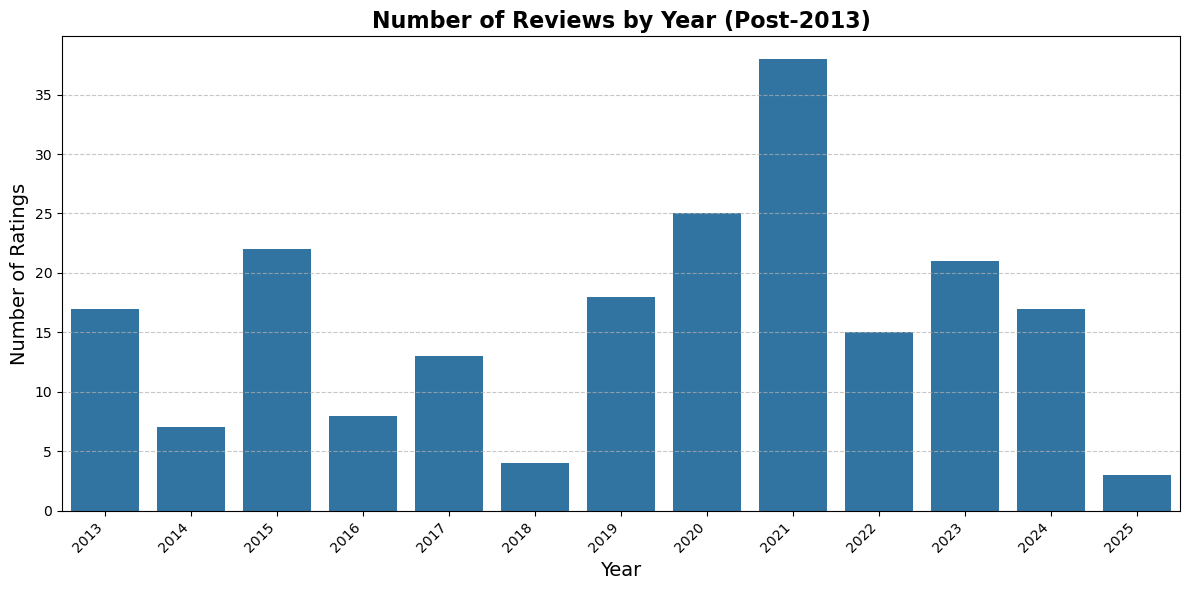

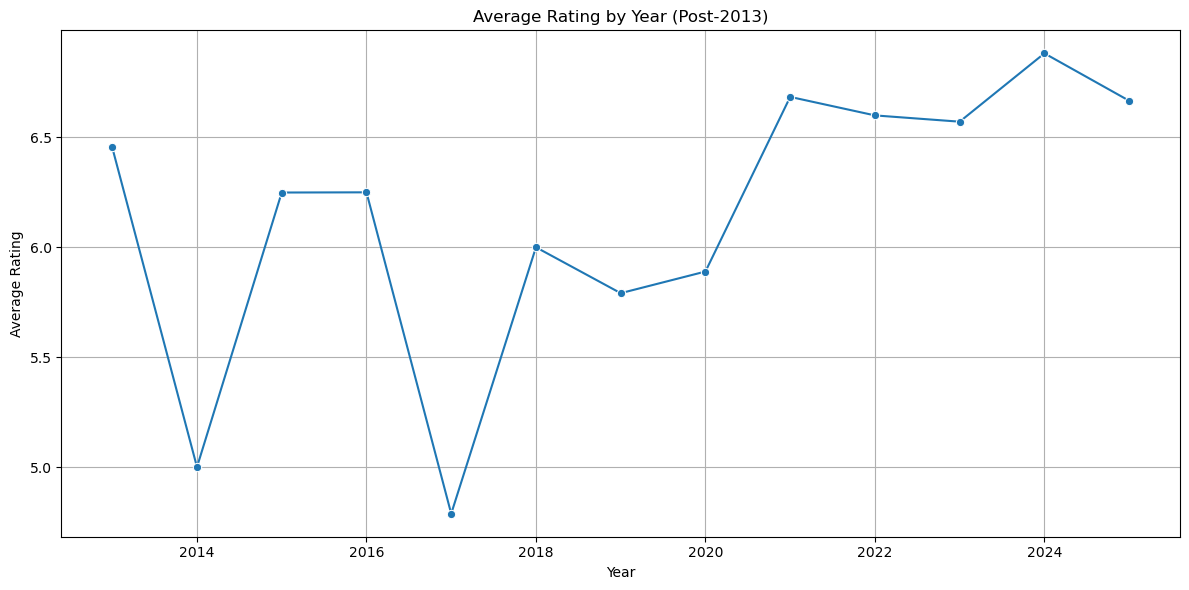

In [357]:
# Calculate the number of ratings (reviews) for each year
ratings_per_year_2 = df_cleaned_2003_later.groupby('Year').size()


plt.figure(figsize=(12, 6))
sns.barplot(x=ratings_per_year_2.index, y=ratings_per_year_2.values)
plt.title('Number of Reviews by Year (Post-2013)', fontsize=16, fontweight='bold')
plt.xlabel('Year', fontsize=14)
plt.ylabel('Number of Ratings', fontsize=14)
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

# Calculate the mean rating for each year
ratings_per_year_2 = df_cleaned_2003_later.groupby('Year')['Rating'].mean()

# Plotting the mean rating across years
plt.figure(figsize=(12, 6))
sns.lineplot(data=ratings_per_year_2,  marker='o', linestyle='-')
plt.title('Average Rating by Year (Post-2013)')
plt.xlabel('Year')
plt.ylabel('Average Rating')
plt.grid(True)
plt.tight_layout()
plt.show()



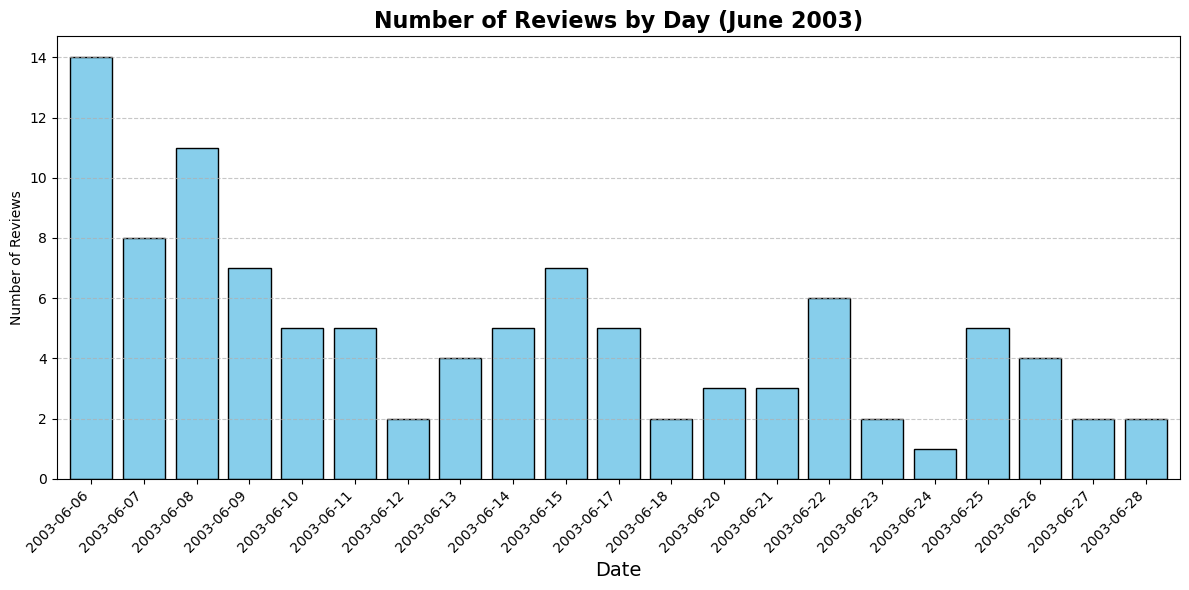

In [358]:
# Plot the distribution of reviews by day for June-July 2001
reviews_by_day_2003 = df_cleaned_2003.groupby(df_cleaned_2003['Date'].dt.date).size()

plt.figure(figsize=(12, 6))
reviews_by_day_2003.plot(kind='bar', color='skyblue', edgecolor='black', width=0.8)
plt.title('Number of Reviews by Day (June 2003)', fontsize=16, fontweight='bold')
plt.xlabel('Date', fontsize=14)
plt.ylabel('Number of Reviews')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()




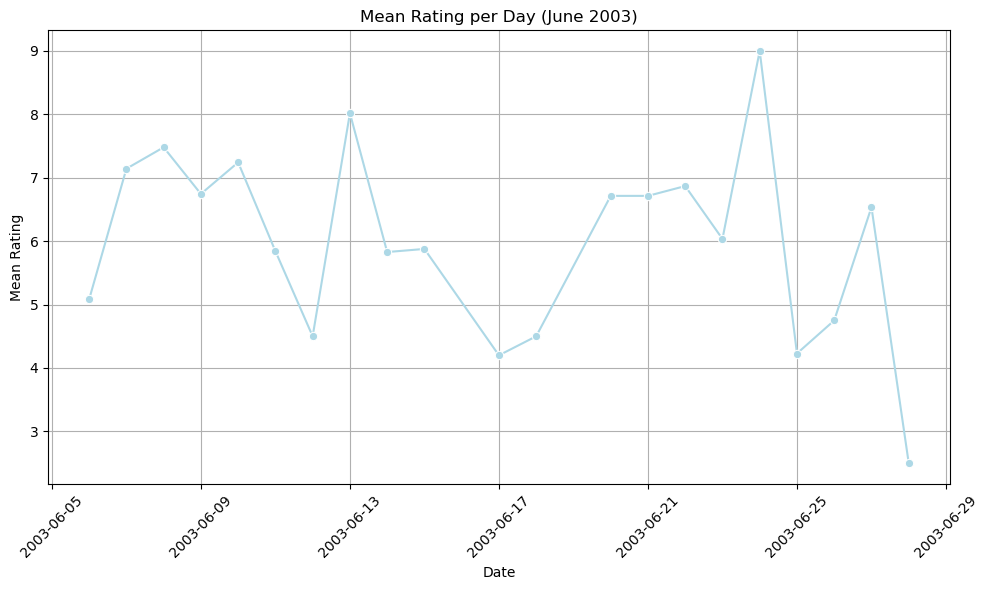

In [359]:
mean_rating_per_day_2003 = df_cleaned_2003.groupby(df_cleaned_2003['Date'].dt.date)['Rating'].mean()

plt.figure(figsize=(10, 6))
sns.lineplot(x=mean_rating_per_day_2003.index, y=mean_rating_per_day_2003.values, marker='o', color='lightblue')
plt.title('Mean Rating per Day (June 2003)')
plt.xlabel('Date')
plt.ylabel('Mean Rating')
plt.xticks(rotation=45)
plt.tight_layout()
plt.grid(True)
plt.show()

In [397]:
# Export the cleaned dataset to a CSV file
df_cleaned.to_csv('FAF1_2001_cleaned.csv', index=False)
df_cleaned_l.to_csv('FAF1_2011_cleaned.csv', index=False)
# Export the cleaned dataset to a CSV file
df_cleaned_2003.to_csv('FAF2_2003_cleaned.csv', index=False)
# Export the cleaned dataset to a CSV file
df_cleaned_2003_later.to_csv('FAF1_2013_cleaned.csv', index=False)

